In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import datetime

In [13]:
# Function to download financial data
def download_data(ticker, start_date, end_date):
    try:
        df = yf.download(ticker, start=start_date, end=end_date)
        return df['Close'].rename(ticker)
    except Exception as e:
        print(f"Error downloading data for {ticker}: {e}")
        return pd.Series(name=ticker)

In [14]:
# Setting start and end dates for data
end_date = datetime.datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.datetime.now() - datetime.timedelta(days=20*365)).strftime('%Y-%m-%d')

In [15]:
# List of tickers to download data for
tickers = ['FRSH', 'NEM', 'XOM', 'INR=X']

# Downloading data for each ticker and merging
dataframes = [download_data(ticker, start_date, end_date) for ticker in tickers]
merged_data = pd.concat(dataframes, axis=1).dropna()
merged_data.columns = ['FRESHWORKS', 'GOLD', 'PETROL', 'CURRENCY']

# Saving merged data to a CSV file
merged_data.to_csv('merged_data.csv')

# Loading merged data from CSV
data = pd.read_csv('merged_data.csv')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [16]:
# Converting 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Setting 'Date' column as index
data.set_index('Date', inplace=True)

# Dropping rows with NaN values
data.dropna(inplace=True)

Epoch 1/200


c:\Users\shais\.conda\envs\tf\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0472 - val_loss: 0.0010
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0041 - val_loss: 0.0025
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 8/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 9/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014 - val_loss: 0.0027
Epoch 10/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020 - val_loss: 0.0027
Epoch 11/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 12/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019 - val_lo

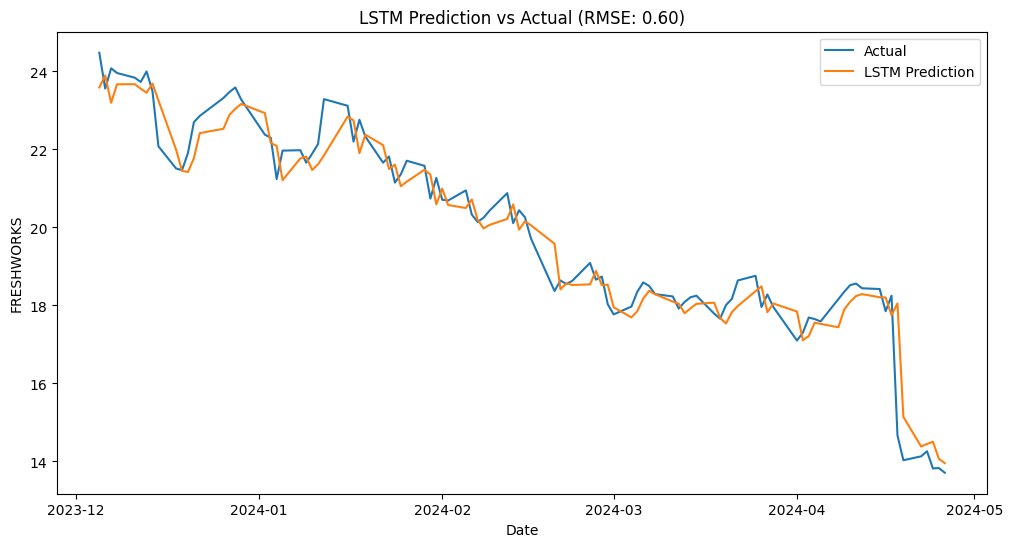

Root Mean Squared Error (RMSE): 0.60
Error Percentage: 3.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Forecasted stock prices for the upcoming 7 days:
2024-05-11: 23.454618453979492
2024-05-12: 23.454618453979492
2024-05-13: 23.454618453979492
2024-05-14: 23.454618453979492
2024-05-15: 23.454618453979492
2024-05-16: 23.454618453979492


In [48]:
# Define the target variable
target_variable = 'FRESHWORKS'

# Get the target variable values
y = data[target_variable].values.reshape(-1, 1)

# Scale the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler.fit_transform(y)

# Define a function to create sequences
def create_sequences(data, seq_length):
    sequences, targets = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        target = data[i+seq_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

# Define the sequence length
sequence_length = 10

# Create sequences for LSTM model
X_seq, y_seq = create_sequences(y_scaled, sequence_length)

# Split the data into train, validation, and test sets
train_size, val_size = int(len(X_seq) * 0.7), int(len(X_seq) * 0.15)
test_size = len(X_seq) - train_size - val_size
X_train, y_train = X_seq[:train_size], y_seq[:train_size]
X_val, y_val = X_seq[train_size:train_size+val_size], y_seq[train_size:train_size+val_size]
X_test, y_test = X_seq[train_size+val_size:], y_seq[train_size+val_size:]

# Define the LSTM model architecture
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# Train the LSTM model
model_lstm.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_val, y_val), verbose=1)

# Predictions on the test set
y_pred_lstm = model_lstm.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred_lstm_inv = scaler.inverse_transform(y_pred_lstm)
y_test_inv = scaler.inverse_transform(y_test)

# Calculate RMSE
rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, y_pred_lstm_inv))

# Plot actual vs. predicted prices
test_dates = data.index[train_size+val_size: train_size+val_size+len(y_test_inv)]
plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test_inv, label='Actual')
plt.plot(test_dates, y_pred_lstm_inv, label='LSTM Prediction')
plt.title(f'LSTM Prediction vs Actual (RMSE: {rmse_lstm:.2f})')
plt.xlabel('Date')
plt.ylabel(target_variable)
plt.legend()
plt.show()

# Calculate error percentage
error_percentage = (rmse_lstm / np.mean(y_test_inv)) * 100
print(f'Root Mean Squared Error (RMSE): {rmse_lstm:.2f}')
print(f'Error Percentage: {error_percentage:.2f}%')

# Forecasting for the upcoming 7 days
forecasted_values_scaled = []
for _ in range(7):
    X_new = np.array([X_test[i]])
    forecasted_value_scaled = model_lstm.predict(X_new)[0][0]
    forecasted_values_scaled.append(forecasted_value_scaled)
    X_test = np.concatenate((X_test, X_new), axis=0)

forecasted_values = scaler.inverse_transform(np.array(forecasted_values_scaled).reshape(-1, 1))
forecasted_dates = pd.date_range(data.index[-1], periods=7, freq='D')[1:]

print("Forecasted stock prices for the upcoming 7 days:")
for date, price in zip(forecasted_dates, forecasted_values):
    print(f"{date.strftime('%Y-%m-%d')}: {price[0]}")